# Analise de Vendas em Retalho

![Retail Sales Analysis](https://miro.medium.com/v2/resize:fit:2000/1*KbbY43dfAFYJ4QU0ZITyfQ.jpeg)
*Fonte: [Medium](https://medium.com/@theazeusofficial/sales-analysis-portfolio-project-insight-into-fmcg-retail-industry-f7b306e37e9e)*


Para Essa analise vamos usar o modelo de data Analitics, que envolve o ciclo de vida de um projecto de Analytics, que são:

![Ciclo de vida de um projecto de data Analytics](https://media.licdn.com/dms/image/D4D22AQHdEPuhgp2kog/feedshare-shrink_1280/0/1706104696009?e=1723680000&v=beta&t=yI0ycatU0DeZSa8nCeMlVW-ltyw3wSDB1BouXzKNCE4)

*Fonte: [linkedin](https://www.linkedin.com/posts/mr-sagar-kumar_dataanalytics-dataanalysis-dataanalyst-activity-7155921753456705537-k80W/)*

Este Projecto seguirá esses passos, com base no Ciclo de vida de um projecto de data Analytics.

- Asking the Question: 
    - O processo Analitico, sempre começa com uma questão a ser respondida. Algumas são simples, outras são complexas.
- Getting the data 
    - Esse processo envolve a localização e obtenção dos dados que é relevante para a questão. E depois determinar se há dados suficientes para completar a analise.
- Investigating the data 
    - Dados vêm em muitos formatos e de muitas fontes diferentes, Esta fase envolve determinar se os dados é completo, e se contém as informações relevantes para a analise.
- Preparing the data 
    - Este passo pode envolver muitas tarefas para transformação dos dados em um formato apropriado para as ferramentas que serão usadas para analise e apresentação dos dados. Também referido como "Limpeza dos dados". 
- Analyze the data 
    - Analise é o processo de identificar padrões, correlações e relacionamento existente no conjunto de dados, para inferencias e conclusões. A Analise depende frequentemente nas tecnicas de estatistica, softwares e aplicativos de vizualizações.
- Present the results 
    - Esse é usualmente a ultima etapa para os analista de dados. É o processo de comunicar os resultados para a tomada de decisão. Pode ser feita na forma de relatorios, graficos ou combinação dos dois. Algumas vezes os Analista de dados é pedido a dar recomendações com base nos resultados encontrados.


---
### 1. Fazendo a pergunta:

Este é o primeiro passo para uma analise de dados, ou seja a pergunta que deve ser respondida. Neste caso a pergunta a ser respondida é:
- Como melhorar as vendas da loja?

Com base nisso podemos responder as seguintes questões:
1. Qual categoria de produtos mais vendem?
2. Qual categoria de produtos na loja dá mais lucro?
3. Qual sexo compra mais produtos e dá mais lucro?
4. Que faixa etaria mais compra, e qual categoria de produto mais compram?
5. Comportamento de compra por dia, mês e ano, total e por categoria de produtos!
6. Como os clientes adaptam seus hábitos de compra durante as tendências sazonais?
7. Quais categorias de produtos têm maior apelo entre os clientes?
8. Quais são as relações entre idade, gastos e preferências de produto?
9. Como a idade e o sexo do cliente influenciam seu comportamento de compra?


### 2. Obtendo os dados

O conjunto de dados que temos, servirá para responder as perguntas necessárias para a nossa analise.

O Dataset pertence ao tipo de licença de dominio publico CC0: Public Domain, que está disponível para Download na plataforma  [Keagle - Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data?select=retail_sales_dataset.csv), criado por __*MOHAMMAD TALIB*__.

Nos Obtemos o arquivo *CSV*.

### 3. Investigando os dados
Esse conjunto de dados possui o necessário para o tipo de perguntas que precisam ser respondidas, está distribuido da seguinte forma, O Dataset contém os seguintes atributos::

1. Transaction ID: Um identificador exclusivo para cada transação, permitindo rastreamento e referência.
2. Date: A data em que a transação ocorreu, fornecendo insights sobre as tendências de vendas ao longo do tempo.
1. Customer ID: um identificador exclusivo para cada cliente, permitindo uma análise centrada no cliente.
1. Gender: O gênero do cliente (masculino/feminino), oferecendo insights sobre padrões de compra baseados em gênero.
1. Age: A idade do cliente, facilitando a segmentação e exploração de influências relacionadas à idade.
1. Product Category: a categoria do produto adquirido (por exemplo, eletrônicos, roupas, beleza), ajudando a entender as preferências do produto.
1. Quantity: Quantidade de unidades do produto adquiridas, contribuindo para insights sobre volumes de compras.
1. Price per Unit: O preço de uma unidade do produto, auxiliando nos cálculos relativos ao gasto total.
1. Total Amount: O valor monetário total da transação, mostrando o impacto financeiro de cada compra.


### 4. Preparando os dados

Vamos carregar os dados, e fazer inspeção se possui valores me falta, valores duplicados, valores unicos, etc.

Começaremos importando os modulos **python** que nos ajudaram na nossa analise:

In [1]:
# importando os modulos necessários para Analise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as pg
from plotly.subplots import make_subplots
import warnings
from pandas.api.types import CategoricalDtype

%matplotlib inline

# removendo mensagens de erros
warnings.filterwarnings("ignore")

In [2]:
# importando o conjunto de dados
df = pd.read_csv("dataset/retail_sales_dataset.csv")
# top 5 linhas do conjunto de dados
df.head()

Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100

Por observação, as colunas [__"Transaction ID", "Customer ID"__] não possuem informações uteis para a nossa analise, e podem ser removidas do conjunto de dados, ou simplesmente podem ser ignoradas, no nosso caso iremos ficar com a segunda opção. se tivesses um conjunto de dados com dezenas de colunas, o melhor será sempre remover as colunas que não geram informações uteis para a analise ou aprendizado.

In [3]:
# Vamos observar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Podemos ver que a data aparece como tipo de dados String (**Object**), precisamos converter para o tipo de data, mas antes vamos mudar os nomes das colunas para algo mais familiar

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
colunas = {
    'Transaction ID':'id_compra', 'Date':'data', 'Customer ID':'id_cliente', 'Gender':'sexo', 'Age':'idade',
       'Product Category':'categoria_produto', 'Quantity':'quantidade', 'Price per Unit':'preço_unitario', 'Total Amount':'valor_total'
}

df.rename(columns=colunas, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_compra          1000 non-null   int64 
 1   data               1000 non-null   object
 2   id_cliente         1000 non-null   object
 3   sexo               1000 non-null   object
 4   idade              1000 non-null   int64 
 5   categoria_produto  1000 non-null   object
 6   quantidade         1000 non-null   int64 
 7   preço_unitario     1000 non-null   int64 
 8   valor_total        1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.data = pd.to_datetime(df.data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          1000 non-null   int64         
 1   data               1000 non-null   datetime64[ns]
 2   id_cliente         1000 non-null   object        
 3   sexo               1000 non-null   object        
 4   idade              1000 non-null   int64         
 5   categoria_produto  1000 non-null   object        
 6   quantidade         1000 non-null   int64         
 7   preço_unitario     1000 non-null   int64         
 8   valor_total        1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
# Vamos ver se temos valores nulos
df.isna().sum()

id_compra            0
data                 0
id_cliente           0
sexo                 0
idade                0
categoria_produto    0
quantidade           0
preço_unitario       0
valor_total          0
dtype: int64

Não temos valores nulos!

Vamos verificar se temos valores duplicados, que só observando o conjunto de dados, pode se notar que n]ao teremos valores duplicados!

In [8]:
df.duplicated().any()

False

Vamos ver para algumas variaveis os tipos de informações que guardam

In [9]:
df.sexo.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['categoria_produto'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

Possuimos apenas categorias de proodutos, ['Beauty', 'Clothing', 'Electronics']!

Vamos analisar o máximo e as idades mínimas, assim como a data mais recente e a mais antiga de compra!

In [11]:
print('idade máxima:',df.idade.max())
print("idade mínima", df.idade.min())

idade máxima: 64
idade mínima 18


In [12]:
print('data de compra mais recente:',df.data.max())
print("data de compra mais antiga", df.data.min())

data de compra mais recente: 2024-01-01 00:00:00
data de compra mais antiga 2023-01-01 00:00:00


Parece que no nosso conjunto de dados, temos valores de Janeiro de 2023 ate Janeiro de 2024, ou seja dados de um ano de venda na loja.

In [13]:
# Quantas linhas e colunas temos nos nosso dados
print("Temos {1} Linhas e {0} colunas".format(df.shape[1],df.shape[0]))

Temos 1000 Linhas e 9 colunas


#### 4.1 Engenharia de Features

Aqui podemos criar algumas colunas com base nas colunas que temos.

In [14]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  
0           3              50          150  
1           2             500         1000  
2           1              30           30  
3           1             500          500  
4           2              50          100

Podemos calcular o Desconto para cada produto vendido, usando a segunite formula:

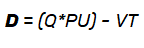

Onde:
- D -> Desconto para o produto
- Q -> Quantidade do produto vendida
- PU -> Preço Unitário do Produto
- VT -> Valor total do produto vendido após o desconto

In [15]:
df['desconto'] = (df['quantidade']*df['preço_unitario']) - df['valor_total']
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  
0           3              50          150         0  
1           2             500         1000         0  
2           1              30           30         0  
3           1             500          500         0  
4           2              50          100         0

In [16]:
df[df['desconto']>0]

Empty DataFrame
Columns: [id_compra, data, id_cliente, sexo, idade, categoria_produto, quantidade, preço_unitario, valor_total, desconto]
Index: []

Pelo resultado podemos dizer que para cada producto, foi vendido sem desconto! ou seja, a lojá não deu desconto para as categorias de produtos que vende!

In [17]:
# Obtendo mês, dia e ano de venda
df['dia'] = df.data.dt.day
# Mês do ano de venda
df['mês'] = df.data.dt.month_name(locale='pt_BR.utf8')
# Ano de Venda
df['ano'] = df.data.dt.year

df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  
0           3              50          150         0   24   Novembro  2023  
1           2             500         1000         0   27  Fevereiro  2023  
2           1              30           30         0   13    Janeiro  2023  
3           1             500          500         0   21       Maio  2023  
4           2              50          100         0    6       Maio  2023

Vamos criar uma segmentação de Idades, considerando como: [Jovem, Adultos, Idosos]

In [18]:
# Repartição de valores
bins = [0,13,24,64,100]
# Labels para esses Valores
labels = ['Infantil','Jovem','Adulto','Idoso']

# Criando a coluna de grupos de idade
df['grupo_idade'] = pd.cut(df['idade'],bins=bins, labels=labels)

# mostrando o dataframe
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0      Adulto  
1      Adulto  
2      Adulto  
3      Adulto  
4      Adulto

In [19]:
df['grupo_idade'].unique()

['Adulto', 'Jovem']
Categories (4, object): ['Infantil' < 'Jovem' < 'Adulto' < 'Idoso']

Para o nosso conjunto de dados, só temos Adultos e jovens, não temos clientes idosos e nem crianças fazendo compras! o que pode ser uma boa questão para analisar, mais detalhadamente, com mais dados, e com o gestor das lojas.

#### 4.2 Analise Exploratoria de Dados

Vamos começar fazendo analise Univariada dos dados, vendo distribuição, quantidade etc.

In [20]:
# Quantos jovens e adultos temos no conjunto de dados
df.grupo_idade.value_counts(ascending=False)

grupo_idade
Adulto      851
Jovem       149
Infantil      0
Idoso         0
Name: count, dtype: int64

In [21]:
df.grupo_idade.value_counts(ascending=False, normalize=True)*100

grupo_idade
Adulto      85.1
Jovem       14.9
Infantil     0.0
Idoso        0.0
Name: proportion, dtype: float64

Podemos ver que Adultos correspondem a 851 pessoas, que equivale a 85% dos clientes que compram em nossa loja.

149 Jovens, que corresponde a 15% dos clientes.

Vendo dessa forma, talvez não seja bom distribuir os clientes por Jovem, Adulto e Idoso, melhor seria fazer a distribuição por faixa de idade

In [22]:
# Repartição de valores
bins = [0,20,40,55,100]
# Labels para esses Valores
labels = ['0-20', '21-40', '41-55', '>55']

# Criando a coluna de grupos de idade
df['grupo_idade'] = pd.cut(df['idade'],bins=bins, labels=labels)

# mostrando o dataframe
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0       21-40  
1       21-40  
2       41-55  
3       21-40  
4       21-40

In [23]:
# Quantos jovens e adultos temos no conjunto de dados
print(df.grupo_idade.value_counts(ascending=False))
display(df.grupo_idade.value_counts(ascending=False, normalize=True)*100)

grupo_idade
21-40    403
41-55    339
>55      195
0-20      63
Name: count, dtype: int64


grupo_idade
21-40    40.3
41-55    33.9
>55      19.5
0-20      6.3
Name: proportion, dtype: float64

Como podemos observar, a maioria dos clientes estão na faixa etaria de 21 a 40 anos de idade, o que corresponde a 40.3% dos clientes, e 33.9% dos clientes estão na faixa etaria dos 41 para 55 anos de idade. Com isso podemos ver o qual seria o publico alvo a atingir em futuras publicidades.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_compra          1000 non-null   int64         
 1   data               1000 non-null   datetime64[ns]
 2   id_cliente         1000 non-null   object        
 3   sexo               1000 non-null   object        
 4   idade              1000 non-null   int64         
 5   categoria_produto  1000 non-null   object        
 6   quantidade         1000 non-null   int64         
 7   preço_unitario     1000 non-null   int64         
 8   valor_total        1000 non-null   int64         
 9   desconto           1000 non-null   int64         
 10  dia                1000 non-null   int32         
 11  mês                1000 non-null   object        
 12  ano                1000 non-null   int32         
 13  grupo_idade        1000 non-null   category      
dtypes: catego

In [25]:
# Distribuição de categoria de produtos
display(df.categoria_produto.value_counts(ascending=False))
print('-'*15)
display(df.categoria_produto.value_counts(ascending=False, normalize=True)*100)

categoria_produto
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

---------------


categoria_produto
Clothing       35.1
Electronics    34.2
Beauty         30.7
Name: proportion, dtype: float64

Temos 3 tipos de categoria de produtos, **Clothing, Electronics, Beauty** na qual a loja vendeu mais procutos do tipo vestuario, o menos vendido na loja pelo os dados que temos é o de produto de **Beleza** que corresponde a 30;7% de dados que possuimos no conjunto de dados.

Vamos analisar quantos homens e mulheres temos no conjunto de dados, e a percentagem que representam.

In [26]:
display(df.sexo.value_counts(ascending=False))
print('-'*25)
display(df.sexo.value_counts(ascending=False, normalize=True)*100)

sexo
Female    510
Male      490
Name: count, dtype: int64

-------------------------


sexo
Female    51.0
Male      49.0
Name: proportion, dtype: float64

Em nosso conjunto de dados, a maioria dos compradores são do sexo femenino, correspondendo a um total de 51% dos clientes.

Vamos ver a distribuição das váriaveis numericas

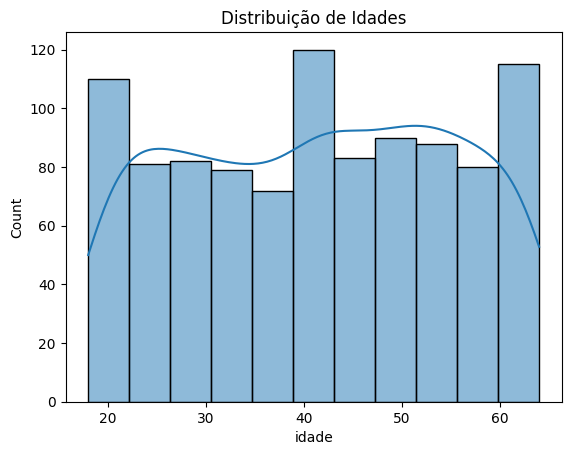

In [27]:
# Distribuição das idades
sns.histplot(df['idade'], kde=True)
plt.title("Distribuição de Idades")
plt.show()

Não parece que temos valores descrepante nas idades, mas podemos observar melhor plotando um grafico de caixa.

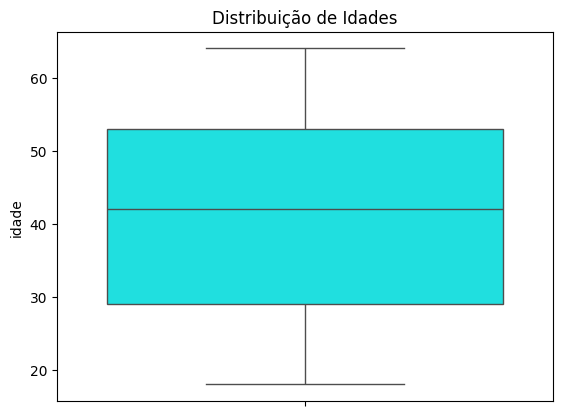

In [28]:
sns.boxplot(df.idade, color='cyan')
plt.title("Distribuição de Idades")
plt.show()

In [29]:
print("A idade média dos clientes é de :",df.idade.mean())
print("50% dos cliente possuem idade ate :",df.idade.median())

A idade média dos clientes é de : 41.392
50% dos cliente possuem idade ate : 42.0


Vamos Observar a distribuição de produtos comprados

In [30]:
df.quantidade.value_counts(normalize=True, ascending=False)

quantidade
4    0.263
1    0.253
2    0.243
3    0.241
Name: proportion, dtype: float64

In [31]:
df.quantidade.mean()

2.514

In [32]:
print('Mediana')
df.quantidade.median()

Mediana


3.0

Podemos dizer que a quantidade média de produtos comprados é 2.5 ~~ 3 produtos por clientes.

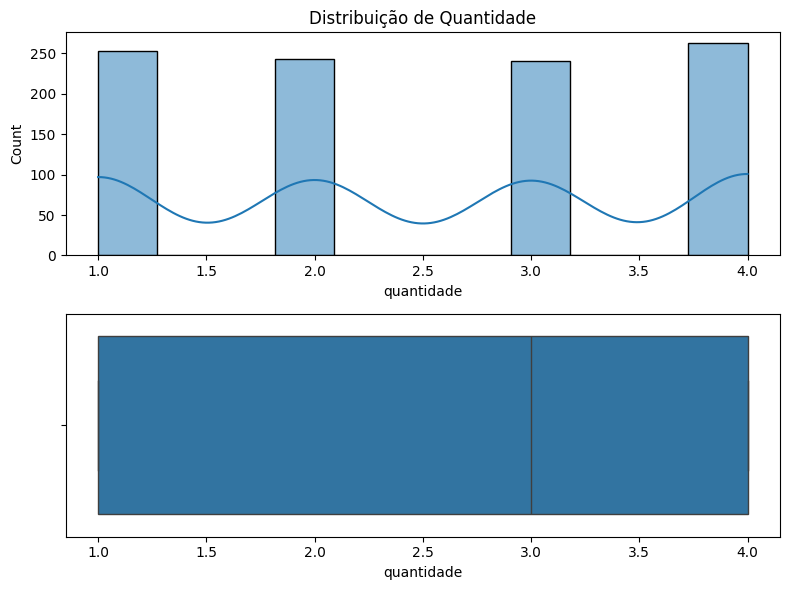

In [33]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

# primeiro grafico
sns.histplot(df['quantidade'], kde=True, ax=ax[0])
ax[0].set_title("Distribuição de Quantidade")

# Segundo Grafico
sns.boxplot(x=df.quantidade, ax=ax[1])

# Ajustando o Layout
plt.tight_layout()


plt.show()

Não Temos Valores descrepantes na quantidade de produtos comprados

In [34]:
def plot_dist_graph(df_col, title):
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    # primeiro grafico
    sns.histplot(df_col, kde=True, ax=ax[0])
    ax[0].set_title(title)
    # Segundo Grafico
    sns.boxplot(x=df_col, ax=ax[1])
    # Ajustando o Layout
    plt.tight_layout()

    return fig

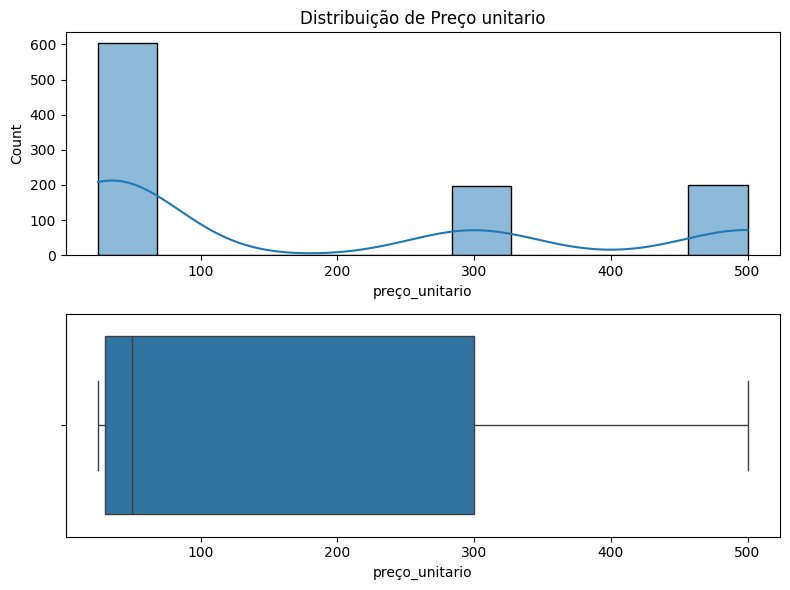

In [35]:
# Distribuição de preço unitario

res = plot_dist_graph(df.preço_unitario, title='Distribuição de Preço unitario')
res.show()
plt.show()

In [36]:
df.preço_unitario.nunique()

5

In [37]:
df.preço_unitario.value_counts()

preço_unitario
50     211
25     210
500    199
300    197
30     183
Name: count, dtype: int64

In [38]:
df.preço_unitario.mean()

179.89

In [39]:
df.preço_unitario.median()

50.0

Podemos Observar que para os Valores de preço unitario, possuimos apenas 4 valores de preço possiveis, 25,30,50,300 e 500, sendo que o preço de 500 pode ser considerado um valor que tende a subir o valor médio de compra, sendo que 50% dos clientes compram produtos a $50.

Com base nisso podemos enquerir que o Valor total, vai apresentar um resultado similar

---

### Analise os dados

Vamos começar fazendo as analise dos dados, e responder as perguntas!


**Analise Bivariavel.**

Agora vamos analisar duas ou mais variaveis conjuntas, assim podendo entender melhor o nosso conjunto de dados.

Vamos começar analisando a relação entre as variaveis, plotando tabelas de correlação, graficos de dispersão e de caixas!

In [40]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0       21-40  
1       21-40  
2       41-55  
3       21-40  
4       21-40

In [41]:
# exibindo uma tabela de correlação
corr = df[['idade','quantidade','preço_unitario','valor_total']].corr()
corr

idade  quantidade  preço_unitario  valor_total
idade           1.000000   -0.023737       -0.038423    -0.060568
quantidade     -0.023737    1.000000        0.017501     0.373707
preço_unitario -0.038423    0.017501        1.000000     0.851925
valor_total    -0.060568    0.373707        0.851925     1.000000

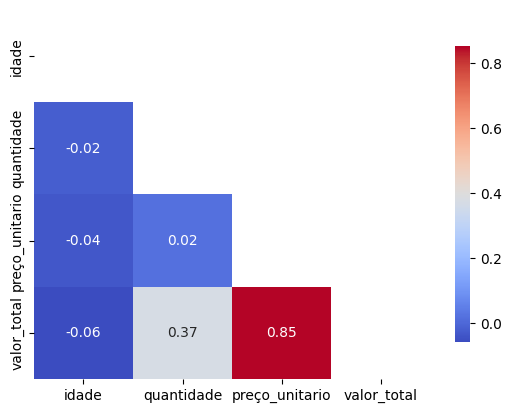

In [42]:
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8} )
plt.show()

Podemos notar que não temos uma clara correlação de pearson entre as variaveis, com excepção do Valor unitario e o Valor total, mas é meio obvio que o valor unitario e a quantidade neste caso ditam o comportamento do valor total.

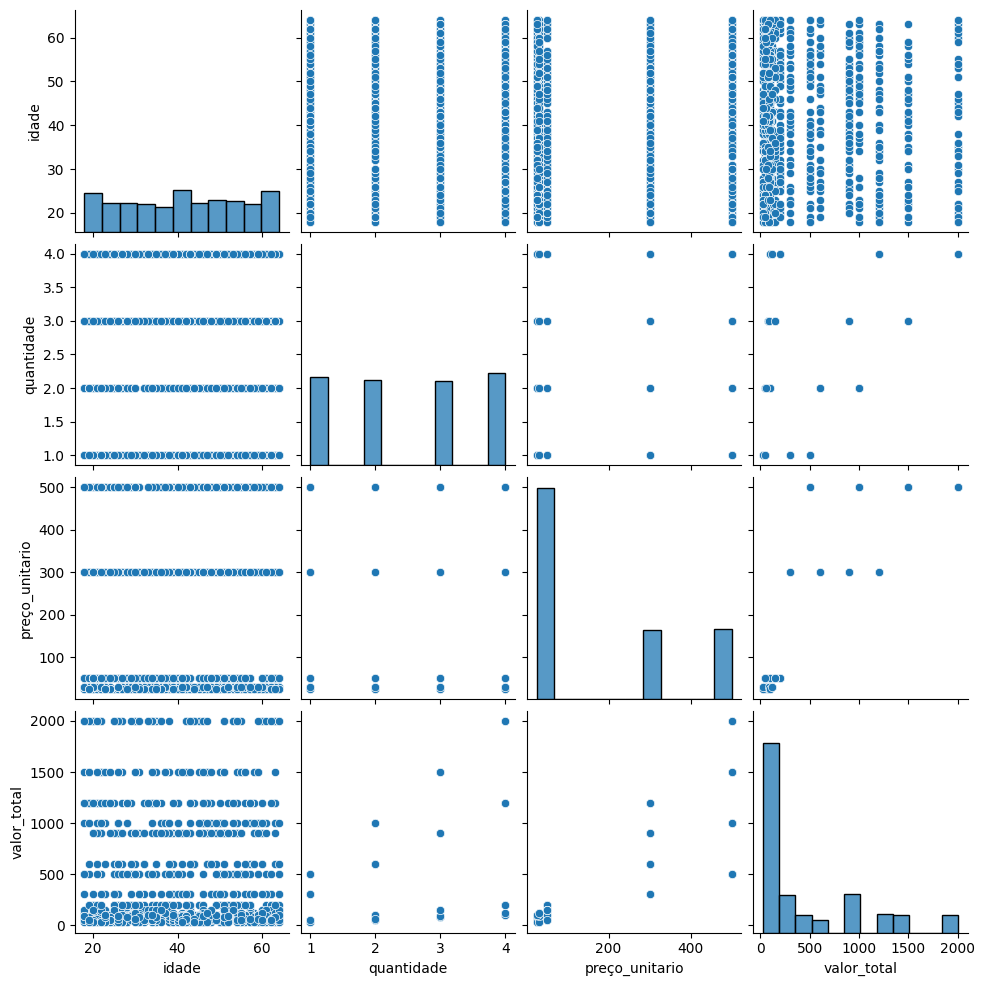

In [43]:
sns.pairplot(df[['idade','quantidade','preço_unitario','valor_total']])
plt.show()

Aqui vamos Começar a responder a Perguntas.

#### 5.1 - Qual categoria de produtos mais vendem?

Vamos ver que categoria de produto é a que mais vende com base na quantidade de produto que vende.

In [44]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0       21-40  
1       21-40  
2       41-55  
3       21-40  
4       21-40

In [45]:
df_group_cat_qtd = df.groupby(['categoria_produto'], as_index=False)['quantidade'].sum().sort_values(['quantidade'],ascending=False)

df_group_cat_qtd.style.background_gradient(subset=['quantidade'], cmap='Blues').set_properties(**{"text-align":'center'},subset=['categoria_produto']
).set_properties(**{"text-align":'right'},subset=['quantidade']
).set_caption("Categoria de Produto que mais vende").set_table_styles(
    [dict(selector='th',props=[('text-align', 'center')])]
)

Podemos perceber que o tipo de produto que mais vende é o de Vestuario, seguida pelos produtos eletronicos e no fim produtos de beleza.

Vamos ver que categoria de produto mais dá lucro para a loja.

#### 5.2 - Qual categoria de produtos na loja dá mais lucro?

In [46]:
df_cat_total_group = df.groupby(['categoria_produto'],as_index=False)['valor_total'].sum().sort_values(['valor_total'],ascending=False)

df_cat_total_group.style.background_gradient(
    cmap='Blues', subset=['valor_total']
).set_properties(**{"text-align":'center'}, subset=['categoria_produto']).set_properties(
    **{'text-align':'right'}, subset=['valor_total']
).set_caption("Categoria de produtos que mais dão lucros").set_table_styles(
    [dict(selector='th',props=[('text-align','left')])]
)

Podemos ver claramente que o produto que mais dá lucro são os produtos eletronicos.

Qual seria o lucro médio para esses produtos

In [47]:
df_mean_cat_total_group = df.groupby(['categoria_produto'],as_index=False)['valor_total'].mean().sort_values(['valor_total'],ascending=False)

df_mean_cat_total_group.style.background_gradient(
    cmap='Blues', subset=['valor_total']
).set_properties(**{"text-align":'center'}, subset=['categoria_produto']).set_properties(
    **{'text-align':'right'}, subset=['valor_total']
).set_caption("Categoria de produtos que mais dão lucros").set_table_styles(
    [dict(selector='th',props=[('text-align','left')])]
)

Podemos notar aqui, que em média, o lucro dos produtos de beleza é maior que os dois outros. poderemos melhor observar esse comportamento quando analisarmos o lucro por mês.

#### 5.3 - Qual sexo compra mais produtos e dá mais lucro?

Vamos começar analisando qual sexo é o que mais compra na nossa loja!

In [48]:
df_sex_qtd_group = df.groupby(['sexo'],as_index=False)['quantidade'].sum().sort_values(['quantidade'],ascending=False)

df_sex_qtd_group.style.background_gradient(
    cmap='Blues', subset=['quantidade']
).set_properties(**{"text-align":'center'}, subset=['sexo']).set_properties(
    **{'text-align':'right'}, subset=['quantidade']
).set_caption("Quem compra mais produtos entre os sexos").set_table_styles(
    [dict(selector='th',props=[('text-align','center')])]
)

In [49]:
# Qual dos sexo dá mais lucro a loja

df_sex_ttl_group = df.groupby(['sexo'],as_index=False)['valor_total'].sum().sort_values(['valor_total'],ascending=False)

df_sex_ttl_group.style.background_gradient(
    cmap='Blues', subset=['valor_total']
).set_properties(**{"text-align":'center'}, subset=['sexo']).set_properties(
    **{'text-align':'right'}, subset=['valor_total']
).set_caption("Qual dos Sexos mais dá lucro").set_table_styles(
    [dict(selector='th',props=[('text-align','center')])]
)

Podemos observar que para os clientes da loja, quem mais compra, e quem mais dá lucro nas compras são clientes de sexo femenino (mulheres), o que indica que podem ser um bom publico alvo para marketing.

#### 5.4 - Que faixa etaria mais compra, e qual categoria de produto mais compram?

In [50]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0       21-40  
1       21-40  
2       41-55  
3       21-40  
4       21-40

In [51]:
# qual faixa etaria mais compra
df_idade_compra_group = df.groupby(['grupo_idade'],as_index=False)['quantidade'].sum().sort_values(['quantidade'],ascending=False)

df_idade_compra_group.style.background_gradient(
    cmap='Blues', subset=['quantidade']
).set_properties(**{"text-align":'center'}, subset=['grupo_idade']).set_properties(
    **{'text-align':'right'}, subset=['quantidade']
).set_caption("Qual das faixas etarias mais compram").set_table_styles(
    [dict(selector='th',props=[('text-align','center')])]
)

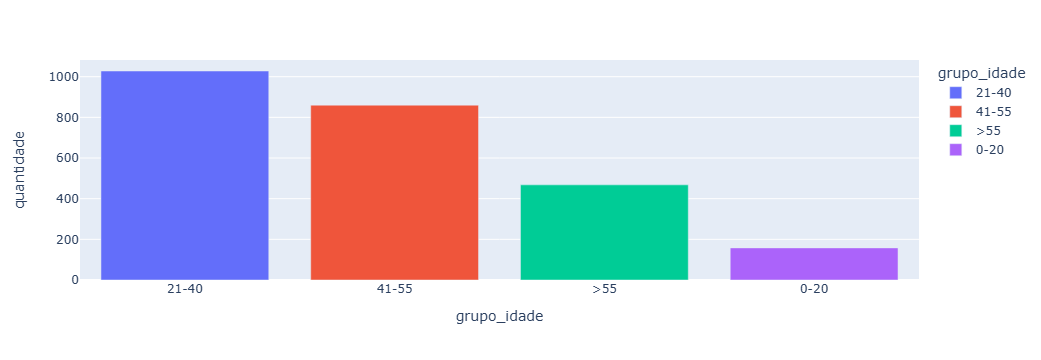

In [52]:
plot_exp_1 = ex.bar(
    data_frame=df_idade_compra_group, x='grupo_idade', y='quantidade', color='grupo_idade'
)
plot_exp_1.show()

Podemos ver que pessoas de idade no intervalo de 21 a 40 anos de idade, são os que mais compram, seguida pela faixa etaria dos 41 a 55, nota-se que adultos tendem a comprar mais que os mais jovens e o mais velhos!

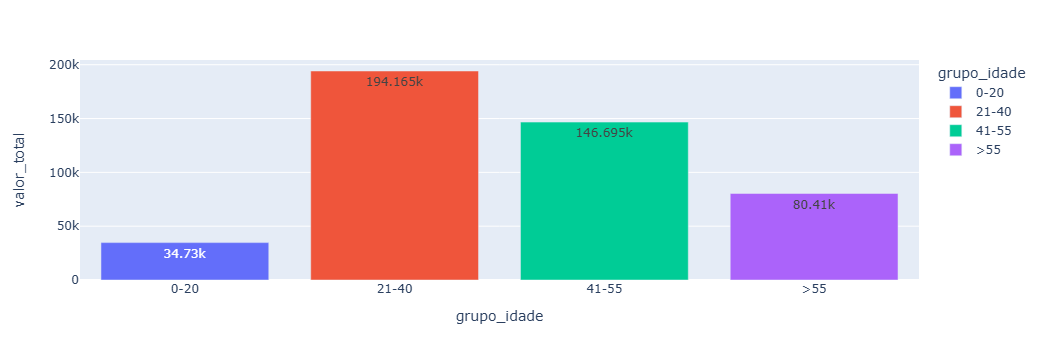

In [53]:
# qual faixa etaria dá mais lucro
df_idades_compra = df.groupby(['grupo_idade'],as_index=False)['valor_total'].sum()
plot_exp_2 = ex.bar(
    data_frame=df_idades_compra, x='grupo_idade', y='valor_total', color='grupo_idade',
    text_auto=True
)
plot_exp_2.show()

Assim como mostrado acima, intervalo de idade podemos notar idades acima de 21 anos correspondem a uma percentagem maior dos clientes que mais dão lucro.

Podemos ver também em média, o quanto cada faixa etaria gasta comprando na loja, e quanto produto compram em média!

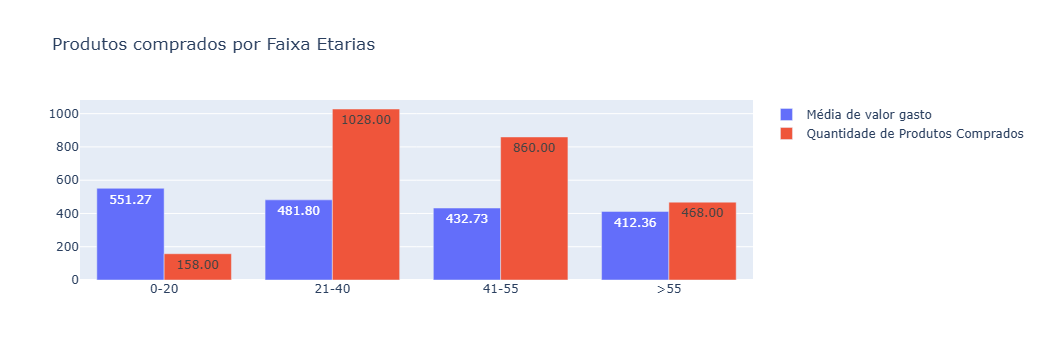

In [54]:
df_compra_media_idade = df.groupby(['grupo_idade'],as_index=False)['valor_total'].mean()
df_quant_compra_media_idade = df.groupby(['grupo_idade'],as_index=False)['quantidade'].sum()


plot_exp_3 = pg.Figure(data=[
    pg.Bar(name="Média de valor gasto", x=df_compra_media_idade['grupo_idade'], 
           y=df_compra_media_idade['valor_total'], 
           text= df_compra_media_idade['valor_total'].apply(lambda x: f'{x:.2f}')
          ),
    pg.Bar(name="Quantidade de Produtos Comprados", x=df_quant_compra_media_idade['grupo_idade'], 
           y=df_quant_compra_media_idade['quantidade'], 
           text= df_quant_compra_media_idade['quantidade'].apply(lambda x: f'{x:.2f}')
          )
])

plot_exp_3.update_layout(
    title="Produtos comprados por Faixa Etarias",yaxis_categoryorder = "total ascending"
)

plot_exp_3.show()

Podemos notar com esse grafico que em média, os mais jovens de idade menor a 21, compram menos, mas em média gastam mais que outras idades, o que pode indicar que compram produto mais caros, do que a outras faixas etarias!

Já descobrimos que a faixa etaria que mais compra são a de 21 a 40, e a que menos compra é a menor de 20 anos, que compram pouco, mas compram produtos mais caros!

Agora vamos visualizar **qual categoria de produto cada faixa etaria mais compram**

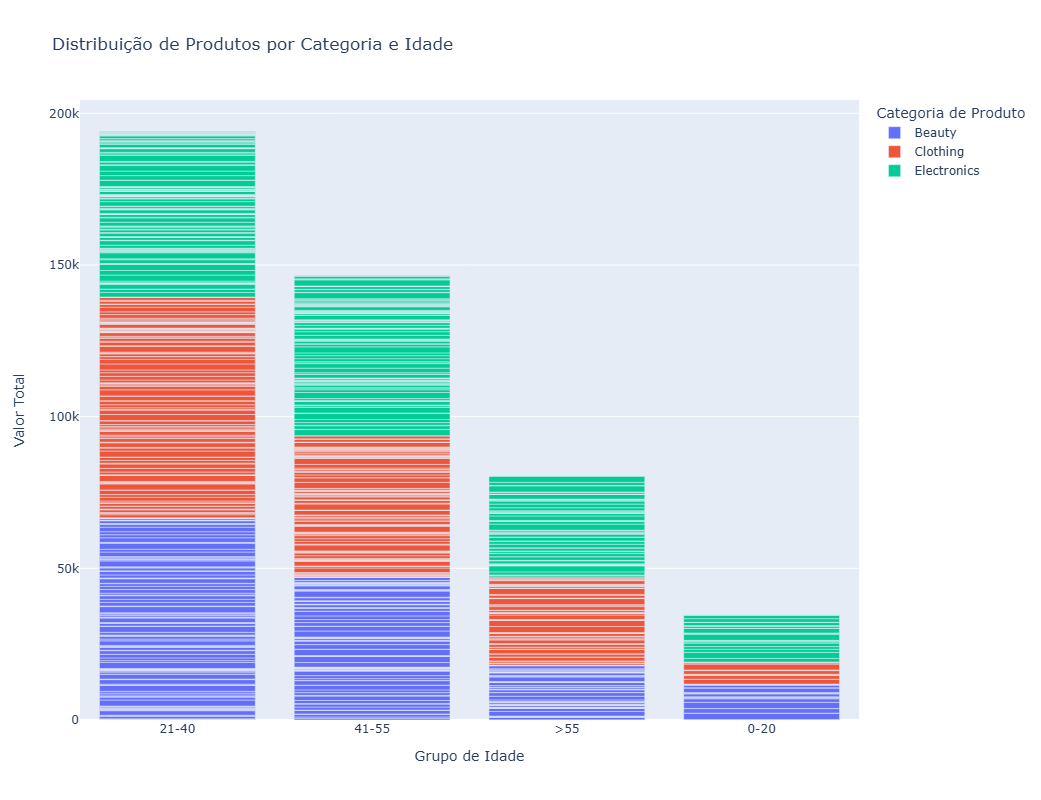

In [55]:
# Criar gráfico de sunburst
plot_exp_4 = ex.bar(df, color='categoria_produto', y='valor_total', x='grupo_idade', 
                    title='Distribuição de Produtos por Categoria e Idade',
                    labels={'categoria_produto': 'Categoria de Produto', 'valor_total': 'Valor Total', 'grupo_idade': 'Grupo de Idade'})
# Ajustar o layout para aumentar o tamanho do gráfico
plot_exp_4.update_layout(
    width=800,  # Largura do gráfico
    height=800  # Altura do gráfico
)
# Exibir o gráfico
plot_exp_4.show()

Podemos Observar com o grafico acima que para as idades menor de 21, gastam mais com produtos tecnologicos que outros tipos de productos, e sabendo que eles compram produtos caros em média, uma marketing direcionado, para esse grupo pode vir a gerar um bom lucro.

Já para outras faixas etarias, seguem padrões similares de compra!

Assim podemos verificar se existe uma mudança para os sexos neste hábito de compra!

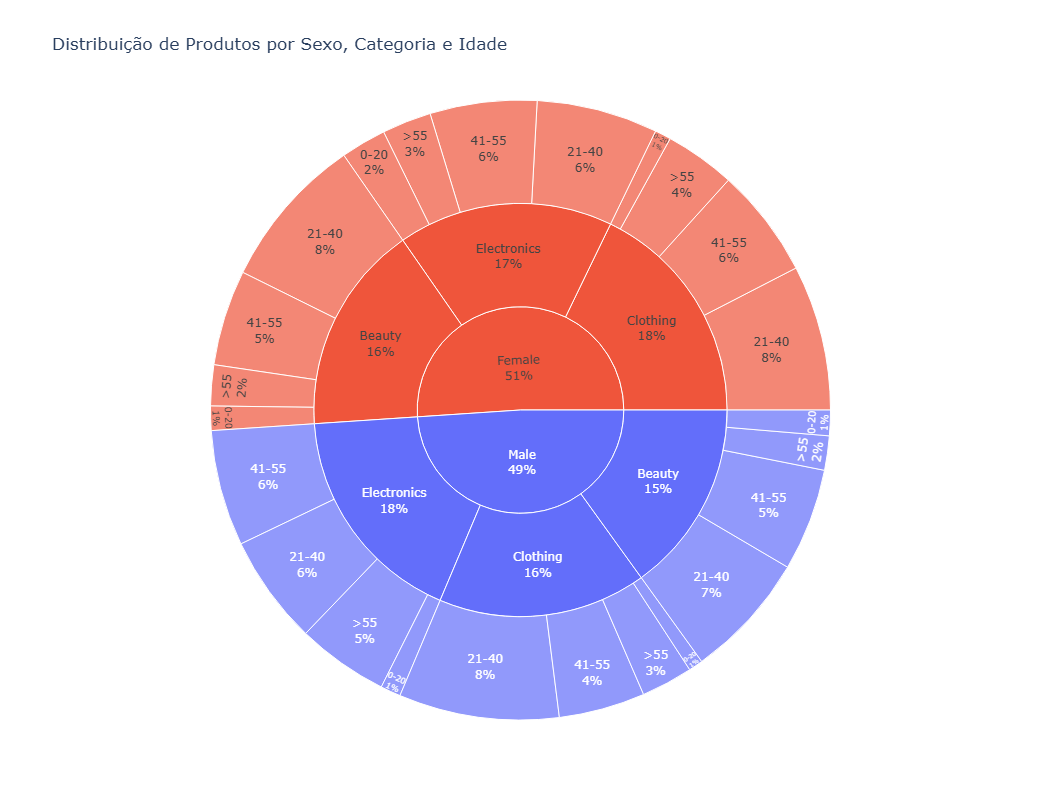

In [56]:
plot_exp_5 = ex.sunburst(df, path=['sexo','categoria_produto', 'grupo_idade'], values='valor_total', color='sexo', 
                         title='Distribuição de Produtos por Sexo, Categoria e Idade')
# Atualizar os traços para exibir as percentagens
plot_exp_5.update_traces(textinfo='label+percent entry')
# Ajustar o layout para aumentar o tamanho do gráfico
plot_exp_5.update_layout(
    width=800,  # Largura do gráfico
    height=800  # Altura do gráfico
)
# Exibir o gráfico    
plot_exp_5.show()

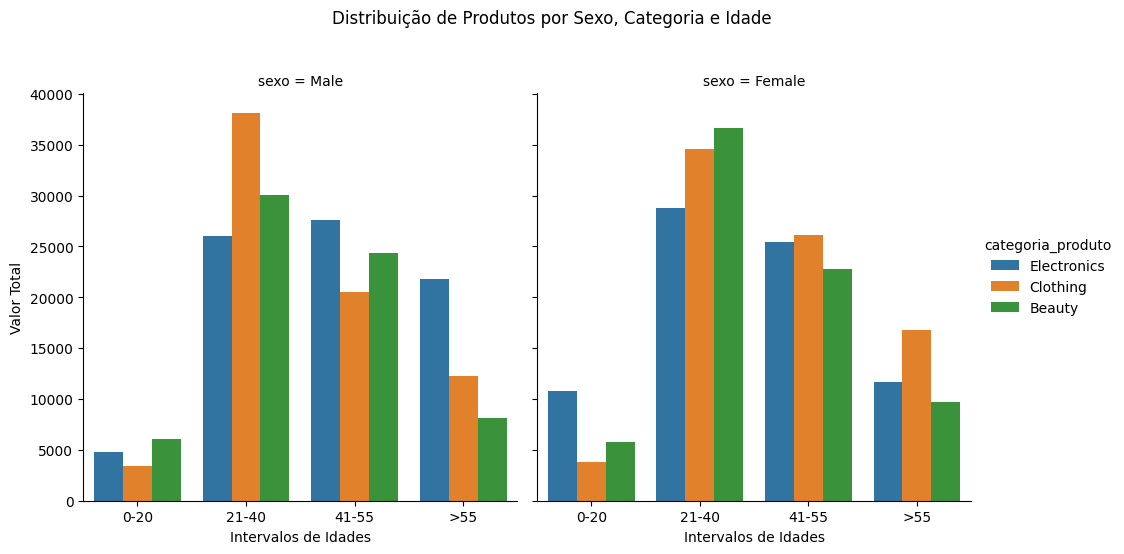

In [57]:
plot_sns_1 = sns.catplot(data=df, x='grupo_idade', y='valor_total', hue='categoria_produto', hue_order=['Electronics','Clothing','Beauty'],
                         estimator='sum', kind='bar',col='sexo', errorbar=None
)
plot_sns_1.set_ylabels("Valor Total")
plot_sns_1.set_xlabels('Intervalos de Idades')
plot_sns_1.set_titles()
plt.suptitle('Distribuição de Produtos por Sexo, Categoria e Idade',x=0.5, y=1.1
)
plt.show()

Podemos notar como já ilustrado no grafico de pizza acima, e também ilustrado no grafico de barra acima, podemos notar que Homens na idade entre 21 a 40, tendem a gastar mais com roupas na loja, e depois produtos de beleza, já para as mulheres da mesma idade, tendem a comprar mais produtos de beleza, e roupas a seguir, o que indica que para essa faixa etaria, para ambos os sexos, é um bom ponto a mirar na hora de vender certas categorias de produtos.



#### 5.5 - Comportamento de compra por dia, mês e ano, total e por categoria de produtos!


Aqui vamos ver o comportamento de compra dos clientes ao longo do dia, mês e ano.

##### 5.5.1 - Comportamento de compra por dia!

Vamos ver que produtos os cliente mais compram em um determinado dia da semana!

In [58]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade  
0       21-40  
1       21-40  
2       41-55  
3       21-40  
4       21-40

In [59]:
# agrupando os dados por dia, e tipo de produto
group_dia_df = df.groupby(['dia','categoria_produto'], as_index=False)['valor_total'].sum()

group_dia_df

dia categoria_produto  valor_total
0     1            Beauty         7255
1     1          Clothing         9185
2     1       Electronics         7240
3     2            Beauty         2270
4     2          Clothing         5565
..  ...               ...          ...
88   30          Clothing         4460
89   30       Electronics         1100
90   31            Beauty         1960
91   31          Clothing         5340
92   31       Electronics         4000

[93 rows x 3 columns]

Agora vamos plotar o grafico de vendas por dia!

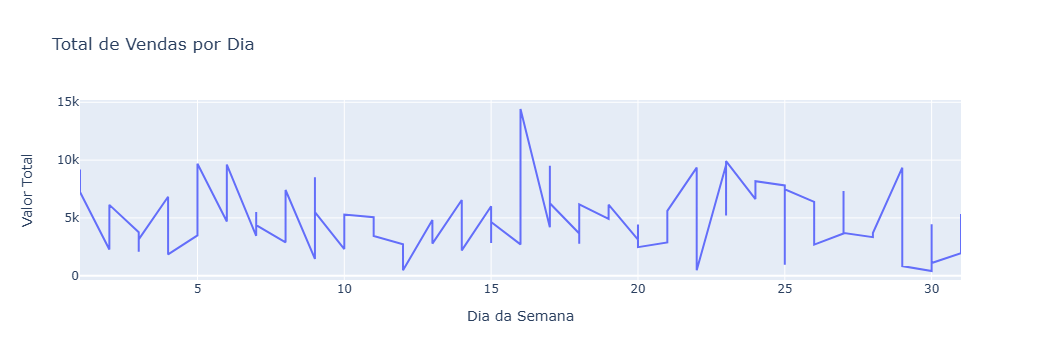

In [60]:
# Criar gráfico de linhas para o total de vendas por dia
plot_exp_6 = ex.line(group_dia_df, x='dia', y='valor_total', 
               title='Total de Vendas por Dia',
               labels={'dia': 'Dia da Semana', 'valor_total': 'Valor Total'})

# Exibir o gráfico
plot_exp_6.show()


Vamos plotar o grafico de vendas por dia, com as respectivas categorias

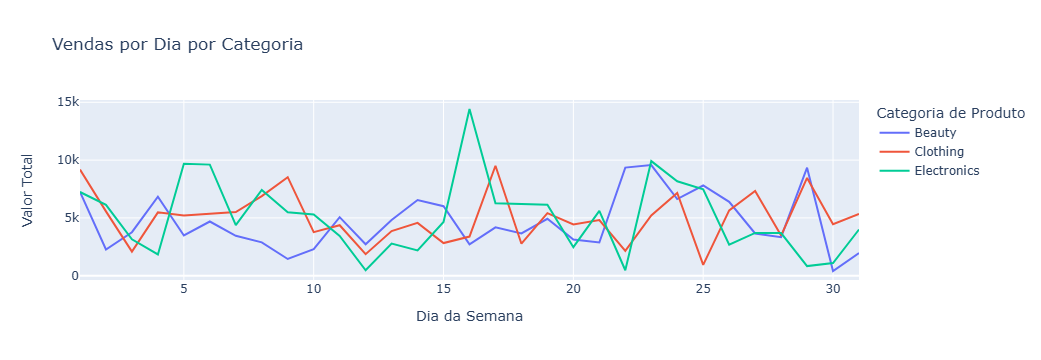

In [61]:
# Criar gráfico de linhas para as vendas por dia por categoria
plot_exp_7 = ex.line(group_dia_df, x='dia', y='valor_total', color='categoria_produto', 
               title='Vendas por Dia por Categoria',
               labels={'dia': 'Dia da Semana', 'valor_total': 'Valor Total', 'categoria_produto': 'Categoria de Produto'})

# Exibir o gráfico
plot_exp_7.show()

Os dados obtidos contemplam apenas para 1 ano, então podem não ser muito indicativo do padrão de compra dos clientes, mas com essa analise podemos ver que existe uma clara tendência de compra de materias eletronicos ao longo dos dias.

##### 5.5.2 - Comportamento de venda por mês!

Embora só tenhamos os meses de um ano, ainda é interessante ver por mês o que os clientes mais compram nos meses!

In [62]:
df.mês.unique()

array(['Novembro', 'Fevereiro', 'Janeiro', 'Maio', 'Abril', 'Marã§o',
       'Dezembro', 'Outubro', 'Agosto', 'Setembro', 'Junho', 'Julho'],
      dtype=object)

In [64]:
mes_group_df_1 = df.groupby(['mês'], as_index=False)['valor_total'].sum()

In [65]:
# Agrupando por mes
mes_group_df_2 = df.groupby(['mês','categoria_produto'], as_index=False)['valor_total'].sum()

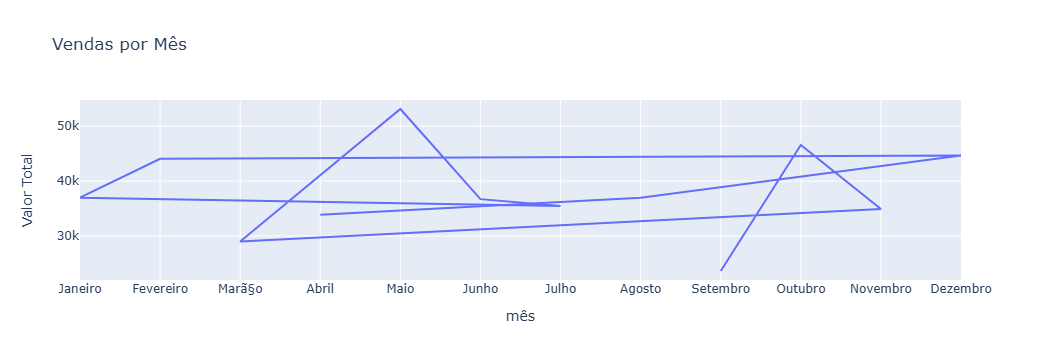

In [66]:
# Criar gráfico de linhas para as vendas por mês
plot_exp_8 = ex.line(mes_group_df_1, x='mês', y='valor_total', #color='categoria_produto', 
               title='Vendas por Mês',
               labels={'dia': 'Dia da Semana', 'valor_total': 'Valor Total'},
            category_orders={'mês':['Janeiro', 'Fevereiro', 'Marã§o', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']}
                    )

# Exibir o gráfico
plot_exp_8.show()

Por uma ordem nos mesês não mostrou uma ordem organizada dos dados, isso pode ser dado devido aos dados serem de apenas 1 ano, para uma analise dessas é necessário que se tenha mais dados, para poder tirar uma analise favoravel sem bias! 

Um melhor tratamento nas colunas, qdo se usa o pandas para converter os mêses de numero para o nome!

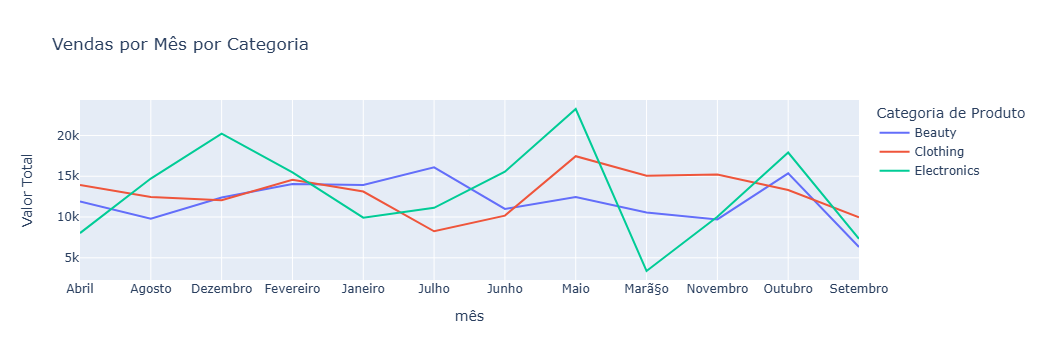

In [67]:
# Criar gráfico de linhas para as vendas por mês por categoria
plot_exp_9 = ex.line(mes_group_df_2, x='mês', y='valor_total', color='categoria_produto', 
               title='Vendas por Mês por Categoria',
               labels={'dia': 'Dia da Semana', 'valor_total': 'Valor Total', 'categoria_produto': 'Categoria de Produto'},
               #category_orders={'mês':['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']}
                )

# Exibir o gráfico
plot_exp_9.show()

#### 5.6 - Como os clientes adaptam seus hábitos de compra durante as tendências sazonais?


Aqui vamos ver como é o habito de compra dos clientes com base em certa epocas sazonais.

In [68]:
season_map = {1: 'Inverno', 2: 'Inverno', 3: 'Primavera', 4: 'Primavera', 5: 'Primavera',6: 'Verão', 7: 'Verão', 8: 'Verão', 9: 'Outono', 10: 'Outono', 11: 'Outono', 12: 'Inverno'}
df['sazonalidade'] = df['data'].dt.month.map(season_map)

In [69]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade sazonalidade  
0       21-40       Outono  
1       21-40      Inverno  
2       41-55      Inverno  
3       21-40    Primavera  
4       21-40    Primavera

In [70]:
df_vendas_sazonais = df.groupby(['sazonalidade','categoria_produto'], as_index=False)['valor_total'].sum()
df_vendas_sazonais

sazonalidade categoria_produto  valor_total
0       Inverno            Beauty        40365
1       Inverno          Clothing        39755
2       Inverno       Electronics        45610
3        Outono            Beauty        31375
4        Outono          Clothing        38490
5        Outono       Electronics        35255
6     Primavera            Beauty        34900
7     Primavera          Clothing        46460
8     Primavera       Electronics        34650
9         Verão            Beauty        36875
10        Verão          Clothing        30875
11        Verão       Electronics        41390

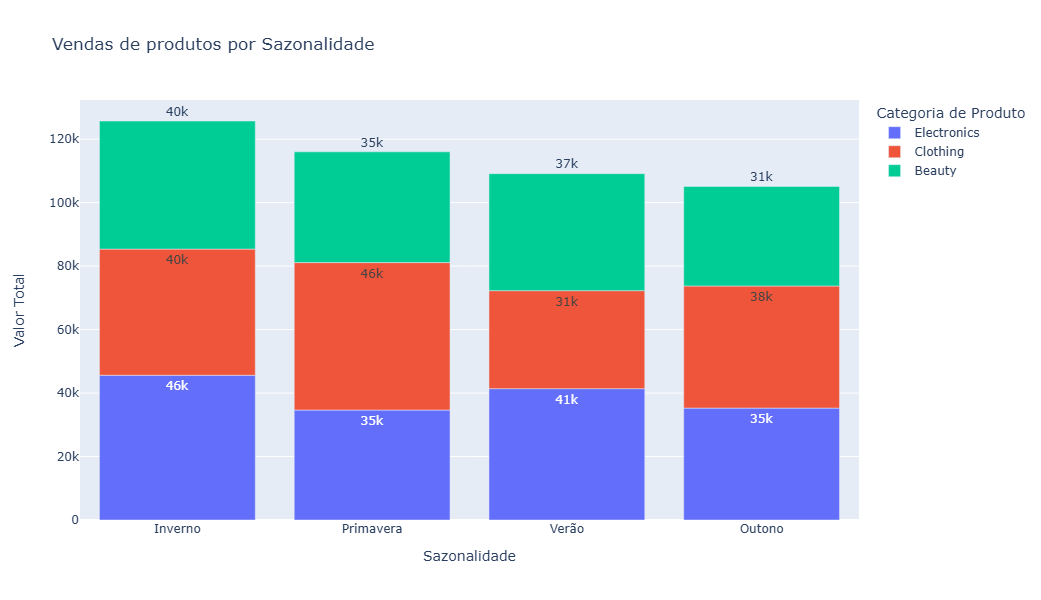

In [72]:
ordem_categorica = CategoricalDtype(categories=['Inverno','Primavera','Verão','Outono'], ordered=True)
df_vendas_sazonais['sazonalidade'] = df_vendas_sazonais['sazonalidade'].astype(ordem_categorica)


plot_exp_10 = ex.bar(df_vendas_sazonais, x='sazonalidade', y='valor_total', color='categoria_produto', 
                    title='Vendas de produtos por Sazonalidade',
                    labels={'sazonalidade': 'Sazonalidade', 'valor_total': 'Valor Total', 'categoria_produto': 'Categoria de Produto'},
                    category_orders={'categoria_produto': ['Electronics', 'Clothing', 'Beauty'], 'sazonalidade':['Inverno','Primavera','Verão','Outono']},
                    text='valor_total')

# Ajustar o layout para melhorar a visualização dos rótulos de texto
plot_exp_10.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustar o layout do gráfico
plot_exp_10.update_layout(
    width=1000,  # Largura do gráfico
    height=600,  # Altura do gráfico
    hovermode='x unified',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

plot_exp_10.show()

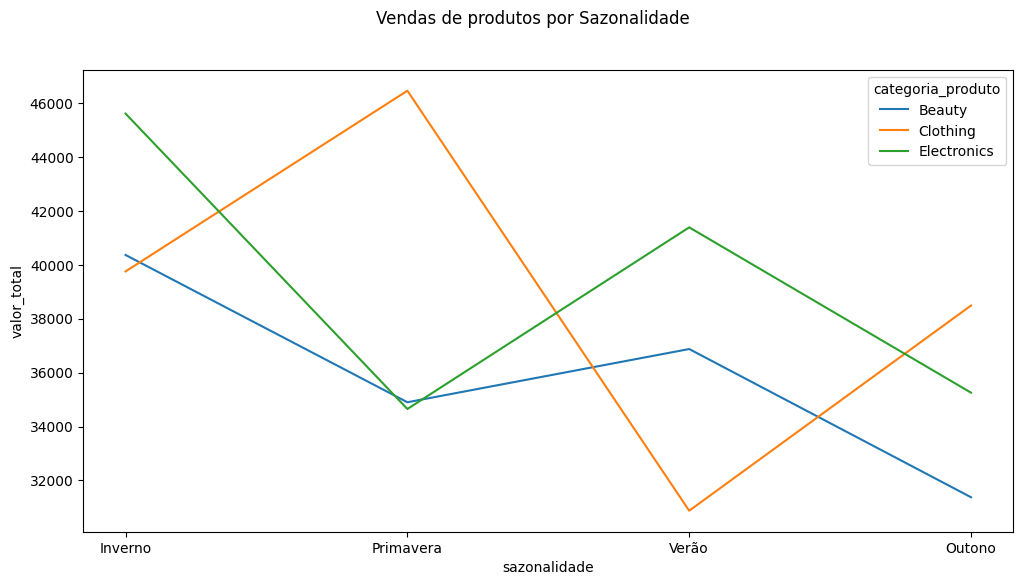

In [61]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=df_vendas_sazonais, y='valor_total',x='sazonalidade', hue='categoria_produto', legend=True, 
             markers=True, errorbar=None)
fig.suptitle('Vendas de produtos por Sazonalidade')
plt.show()

Olhando pela sazonalidade, faz sentido que durante o verão a compra de roupa diminua bastante devido ao calor, e mais pessoas preferem ficar em casa, então a venda de eletronicos é maior, e enquanto vai ficando mais frio, começando do outono, ate a primavera, a venda de vestimenta aumenta bastante.

Já para dispositivos eletronicos, a venda é muito variada ao longo da temporada, mas como temos apenas dados de 1 ano, não podemos afirmar com uma boa precisão se o comportamente se observa para outros anos.

Para os produtos de Beleza, podemos dizer que mantém um poder de venda quase que não apresenta muita alteração no comportamente de compra durante as temporadas sazonais.

#### 5.7 - Quais categorias de produtos têm maior apelo entre os clientes?

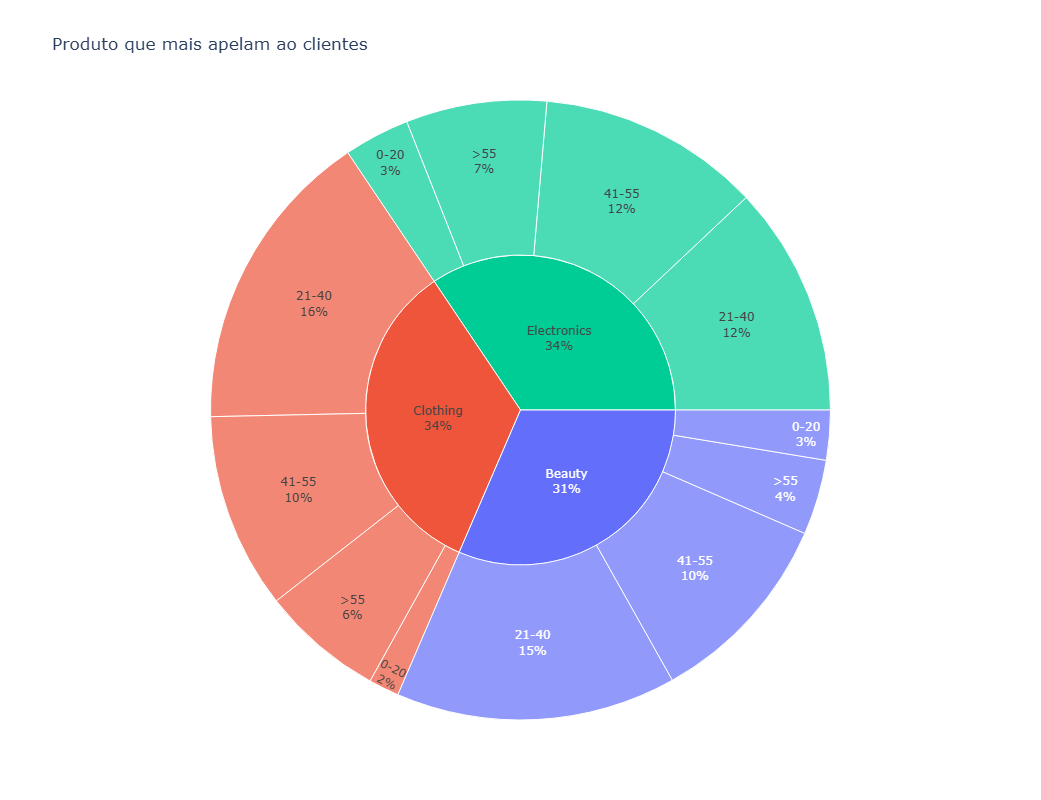

In [73]:
# Criar gráfico de sunburst
plot_exp_11 = ex.sunburst(df, path=['categoria_produto', 'grupo_idade'], values='valor_total', color='categoria_produto',
                        title='Produto que mais apelam ao clientes'
                        )
# Adicionar frequencia em percentagem
plot_exp_11.update_traces(textinfo='label+percent entry')
# Ajustar o layout para aumentar o tamanho do gráfico
plot_exp_11.update_layout(
    width=800,  # Largura do gráfico
    height=800  # Altura do gráfico
)
# Exibir o gráfico
plot_exp_11.show()

Podemos ver pelo grafico acima que produtos tecnologicos e produtos de vestuario, correspondem a aproximadamente 70% dos produtos mais comprados pelos clientes, e também podemos ver no grafico a percentagem comprada pelas idades dos clientes!

#### 5.8 - Quais são as relações entre idade, gastos e preferências de produto?

<Figure size 1200x600 with 0 Axes>

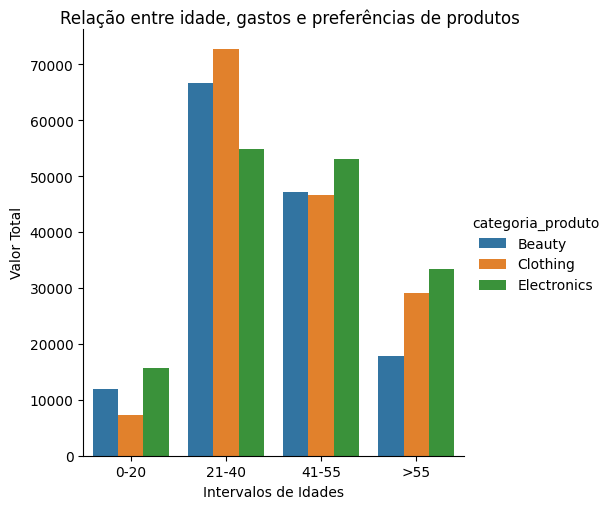

In [75]:
fig = plt.figure(figsize=(12,6))
plot_sns_2 = sns.catplot(data=df, x='grupo_idade', y='valor_total', hue='categoria_produto',
                         estimator='sum', kind='bar', errorbar=None
)
plot_sns_2.set_ylabels("Valor Total")
plot_sns_2.set_xlabels('Intervalos de Idades')
plot_sns_2.set_titles()
plt.suptitle('Relação entre idade, gastos e preferências de produtos',x=0.5, y=1.01)
plt.show()

Podemos ver que existe uma relação nas demais idades existe uma preferência em produtos eletronicos, com a excessão do intervalo faixa etario dos 21 aos 40 anos de idade, que tendem a gastar mais em compras de roupas, considerando ue nesta idade, são jovens entrando no mercado de trabalho, e a relações sociais, por isso tendem a se preocupar mais com o visual, dai uma tendência em comprar vestuarios e produtos de beleza.

#### 5.9 - Como a idade e o sexo do cliente influenciam seu comportamento de compra?

Vamos ilustrar de que forma a idade, o sexo na nossas base de dados, influência o comportamento de compra dos clientes para certas categorias de produtos.

In [76]:
df.head()

id_compra       data id_cliente    sexo  idade categoria_produto  \
0          1 2023-11-24    CUST001    Male     34            Beauty   
1          2 2023-02-27    CUST002  Female     26          Clothing   
2          3 2023-01-13    CUST003    Male     50       Electronics   
3          4 2023-05-21    CUST004    Male     37          Clothing   
4          5 2023-05-06    CUST005    Male     30            Beauty   

   quantidade  preço_unitario  valor_total  desconto  dia        mês   ano  \
0           3              50          150         0   24   Novembro  2023   
1           2             500         1000         0   27  Fevereiro  2023   
2           1              30           30         0   13    Janeiro  2023   
3           1             500          500         0   21       Maio  2023   
4           2              50          100         0    6       Maio  2023   

  grupo_idade sazonalidade  
0       21-40       Outono  
1       21-40      Inverno  
2       41-55      Inverno  
3       21-40    Primavera  
4       21-40    Primavera

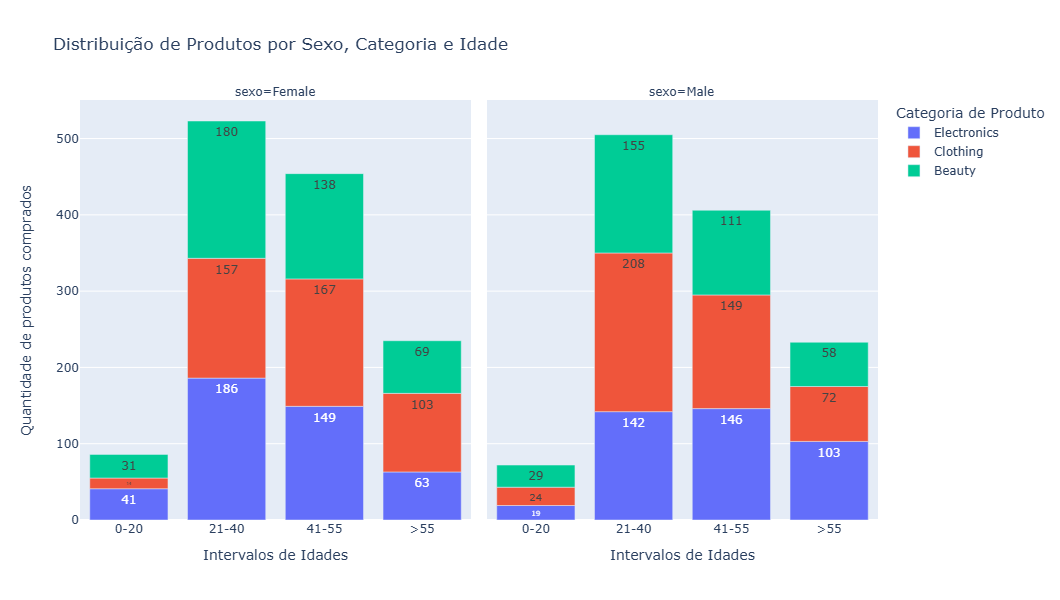

In [76]:
df_grouped_cat = df.groupby(['grupo_idade', 'categoria_produto', 'sexo'], as_index=False)['quantidade'].sum()

# Criar gráfico de barras empilhadas
plot_exp_7 = ex.bar(df_grouped_cat, x='grupo_idade', y='quantidade', color='categoria_produto', 
                    title='Distribuição de Produtos por Sexo, Categoria e Idade',
                    labels={'grupo_idade': 'Intervalos de Idades', 'quantidade': 'Quantidade de produtos comprados', 'categoria_produto': 'Categoria de Produto'},
                    facet_col='sexo', category_orders={'categoria_produto': ['Electronics', 'Clothing', 'Beauty']},
                    text_auto=True
                   )

# Ajustar o layout para aumentar o tamanho do gráfico
plot_exp_7.update_layout(
    width=1000,  # Largura do gráfico
    height=600  # Altura do gráfico
)

# Exibir o gráfico
plot_exp_7.show()

Podemos notar que existe uma forte tendencia em compras de produtos de vestuario para os dois sexos entre várias idades, são so produtos que compram em uma boa quantidade, principalmente para idades compreendias entre 21 a 55. Para o homens maiores de 55, seria uma boa estrategia fazer marketing personalidade quando se trata de novas tecnologias, visto que eles têm uma tendencia de comprar os mesmos!